In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests
import config

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
print(cities)

['longyearbyen', 'samarinda', 'hobart', 'punta arenas', 'kachikau', 'aklavik', 'hambantota', 'vaini', 'khorixas', 'whitehorse', 'mount gambier', 'kamloops', 'cidreira', 'busselton', 'thompson', 'albany', 'buloh kasap', 'esperance', 'kashi', 'natal', 'provideniya', 'mataura', 'aksarka', 'taolanaro', 'barentsburg', 'carnarvon', 'linjiang', 'sentyabrskiy', 'agadir', 'vermilion', 'cape town', 'anacortes', 'ushuaia', 'wynyard', 'rikitea', 'kapaa', 'mar del plata', 'sur', 'half moon bay', 'butaritari', 'san patricio', 'debre tabor', 'upernavik', 'belushya guba', 'illoqqortoormiut', 'lolua', 'bengkulu', 'saint-joseph', 'bredasdorp', 'amderma', 'sibolga', 'luderitz', 'iqaluit', 'kaitangata', 'tarudant', 'saleaula', 'axim', 'ranong', 'columbus', 'cap malheureux', 'lagoa', 'lobito', 'polson', 'hilo', 'talnakh', 'caravelas', 'omaruru', 'port alfred', 'caucaia', 'doctor pedro p. pena', 'castro', 'hobyo', 'plettenberg bay', 'tabiauea', 'arraial do cabo', 'kapuskasing', 'atuona', 'oistins', 'lebu', 

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | samarinda
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | kachikau
City not found. Skipping...
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | hambantota
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | khorixas
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | kamloops
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | buloh kasap
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | kashi
Processing Record 20 of Set 1 | natal
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | aksarka
Processing Record 24 of Set 

Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | curitibanos
Processing Record 37 of Set 4 | arlit
Processing Record 38 of Set 4 | margate
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | saskylakh
Processing Record 41 of Set 4 | ostersund
Processing Record 42 of Set 4 | victoria
Processing Record 43 of Set 4 | jamestown
Processing Record 44 of Set 4 | lulea
Processing Record 45 of Set 4 | kuche
City not found. Skipping...
Processing Record 46 of Set 4 | la libertad
Processing Record 47 of Set 4 | tessalit
Processing Record 48 of Set 4 | koslan
Processing Record 49 of Set 4 | puerto gaitan
Processing Record 50 of Set 4 | bluff
Processing Record 1 of Set 5 | toliary
City not found. Skipping...
Processing Record 2 of Set 5 | tasiilaq
Processing Record 3 of Set 5 | chifeng
Processing Record 4 of Set 5 | olden
Processing Record 5 of Set 5 | shelburne
Processing Record 6 of Set 5 | tecpan
Processing Record 7 of Set 5 | praia
Processing Recor

Processing Record 27 of Set 8 | cabo san lucas
Processing Record 28 of Set 8 | gizo
Processing Record 29 of Set 8 | steamboat springs
Processing Record 30 of Set 8 | bubaque
Processing Record 31 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 32 of Set 8 | shizuishan
Processing Record 33 of Set 8 | quatre cocos
Processing Record 34 of Set 8 | winnemucca
Processing Record 35 of Set 8 | lively
Processing Record 36 of Set 8 | mayo
Processing Record 37 of Set 8 | palmer
Processing Record 38 of Set 8 | talaya
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 41 of Set 8 | ilanskiy
Processing Record 42 of Set 8 | nago
Processing Record 43 of Set 8 | yurino
Processing Record 44 of Set 8 | middlebury
Processing Record 45 of Set 8 | constantine
Processing Record 46 of Set 8 | ziway
Processing Record 47 of Set 8 | huarmey
Processing Record 48 of Set 8 | erzin
Processing Record 49 of Set 8 | taouden

Processing Record 16 of Set 12 | ulaangom
Processing Record 17 of Set 12 | launceston
Processing Record 18 of Set 12 | akdepe
Processing Record 19 of Set 12 | san policarpo
Processing Record 20 of Set 12 | meulaboh
Processing Record 21 of Set 12 | severo-yeniseyskiy
Processing Record 22 of Set 12 | waddan
Processing Record 23 of Set 12 | dire dawa
Processing Record 24 of Set 12 | songkhla
Processing Record 25 of Set 12 | vila velha
Processing Record 26 of Set 12 | bolitoc
Processing Record 27 of Set 12 | zinapecuaro
Processing Record 28 of Set 12 | lianzhou
Processing Record 29 of Set 12 | alzamay
Processing Record 30 of Set 12 | grafton
Processing Record 31 of Set 12 | padang
Processing Record 32 of Set 12 | deer lake
Processing Record 33 of Set 12 | aketi
Processing Record 34 of Set 12 | ketchikan
Processing Record 35 of Set 12 | maghama
City not found. Skipping...
Processing Record 36 of Set 12 | newport
Processing Record 37 of Set 12 | coari
Processing Record 38 of Set 12 | teontha

In [10]:
len(city_data)

551

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,12.04,73,40,3.44,SJ,2021-11-05 23:10:17
1,Samarinda,-0.5000,117.1500,75.85,95,85,0.67,ID,2021-11-05 23:14:38
2,Hobart,-42.8794,147.3294,70.02,60,75,1.99,AU,2021-11-05 23:14:38
3,Punta Arenas,-53.1500,-70.9167,53.71,58,75,28.77,CL,2021-11-05 23:14:38
4,Aklavik,68.2191,-135.0107,20.12,98,92,4.14,CA,2021-11-05 23:14:39
5,Hambantota,6.1241,81.1185,77.92,84,99,13.13,LK,2021-11-05 23:14:39
6,Vaini,-21.2000,-175.2000,82.56,89,40,10.36,TO,2021-11-05 23:14:40
7,Khorixas,-20.3667,14.9667,68.07,29,30,0.72,NA,2021-11-05 23:14:40
8,Whitehorse,60.7161,-135.0538,35.02,86,98,10.00,CA,2021-11-05 23:14:41
9,Mount Gambier,-37.8333,140.7667,55.33,94,100,8.28,AU,2021-11-05 23:14:41


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2021-11-05 23:10:17,78.2186,15.6401,12.04,73,40,3.44
1,Samarinda,ID,2021-11-05 23:14:38,-0.5000,117.1500,75.85,95,85,0.67
2,Hobart,AU,2021-11-05 23:14:38,-42.8794,147.3294,70.02,60,75,1.99
3,Punta Arenas,CL,2021-11-05 23:14:38,-53.1500,-70.9167,53.71,58,75,28.77
4,Aklavik,CA,2021-11-05 23:14:39,68.2191,-135.0107,20.12,98,92,4.14
5,Hambantota,LK,2021-11-05 23:14:39,6.1241,81.1185,77.92,84,99,13.13
6,Vaini,TO,2021-11-05 23:14:40,-21.2000,-175.2000,82.56,89,40,10.36
7,Khorixas,NA,2021-11-05 23:14:40,-20.3667,14.9667,68.07,29,30,0.72
8,Whitehorse,CA,2021-11-05 23:14:41,60.7161,-135.0538,35.02,86,98,10.00
9,Mount Gambier,AU,2021-11-05 23:14:41,-37.8333,140.7667,55.33,94,100,8.28


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

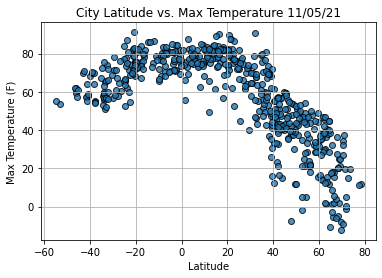

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

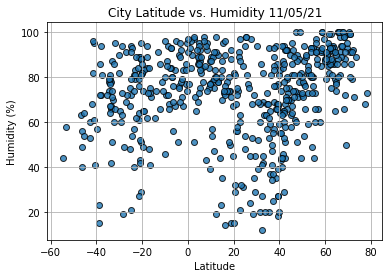

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

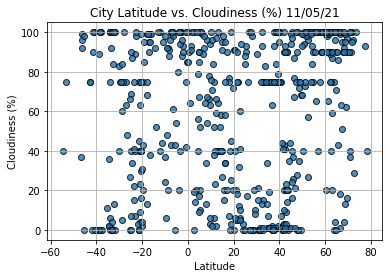

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

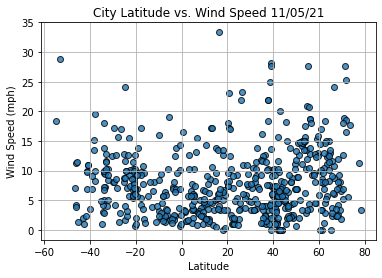

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()